In [1]:
# Name
Name = 'Benyamin'
Last_Name = 'Maleki'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.io import loadmat


NUM_PIXELS = 28*28

In [3]:
def load_model(model_file):
    '''
    Loads a default Bayesian network with latent variables (in this case, a
    variational autoencoder)
    '''

    with open(model_file, 'rb') as infile:
        cpts = pkl.load(infile, encoding='bytes')

    model = {}
    model['prior_z1'] = cpts[0]
    model['prior_z2'] = cpts[1]
    model['cond_likelihood'] = cpts[2]

    return model

In [4]:
global disc_z1, disc_z2
n_disc_z = 25
disc_z1 = np.linspace(-3, 3, n_disc_z)
disc_z2 = np.linspace(-3, 3, n_disc_z)

global bayes_net
bayes_net = load_model('./trained_mnist_model')

In [5]:
def get_p_z1(z1_val):
    '''
    Helper. Computes the prior probability for variable z1 to take value z1_val.
    P(Z1=z1_val)
    '''

    return bayes_net['prior_z1'][z1_val]


def get_p_z2(z2_val):
    '''
    Helper. Computes the prior probability for variable z2 to take value z2_val.
    P(Z2=z2_val)
    '''

    return bayes_net['prior_z2'][z2_val]

In [6]:
def get_p_xk_cond_z1_z2(z1_val, z2_val, k):
    '''
    Helper. Computes the conditional probability that variable xk assumes value 1
    given that z1 assumes value z1_val and z2 assumes value z2_val
    P(Xk = 1 | Z1=z1_val , Z2=z2_val)
    '''

    return bayes_net['cond_likelihood'][(z1_val, z2_val)][0, k-1]


def get_p_x_cond_z1_z2(z1_val, z2_val):
    '''
    Computes the conditional probability of the entire vector x for x = 1,
    given that z1 assumes value z1_val and z2 assumes value z2_val
    '''
    pk = np.zeros(NUM_PIXELS)
    for i in range(NUM_PIXELS):
        pk[i] = get_p_xk_cond_z1_z2(z1_val, z2_val, i+1)
    return pk

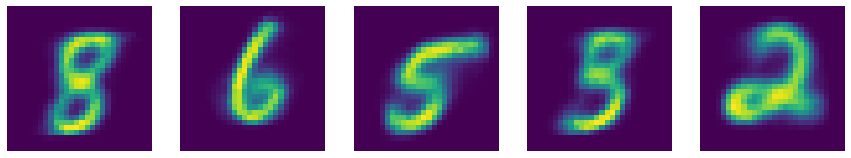

In [21]:
import random
n_samples = 5
samples = []
distribution_z1 = [get_p_z1(i) for i in disc_z1]
distribution_z2 = [get_p_z2(i) for i in disc_z2]
for i in range(n_samples):
    z1 = np.random.choice(disc_z1, p=distribution_z1)
    z2 = np.random.choice(disc_z1, p=distribution_z2)
    samples.append(get_p_x_cond_z1_z2(z1, z2))

fig, axs = plt.subplots(1, n_samples, figsize=(15, 15))
for i in range(n_samples):
    axs[i].imshow(samples[i].reshape(28, 28))
    axs[i].axis('off')
plt.show()



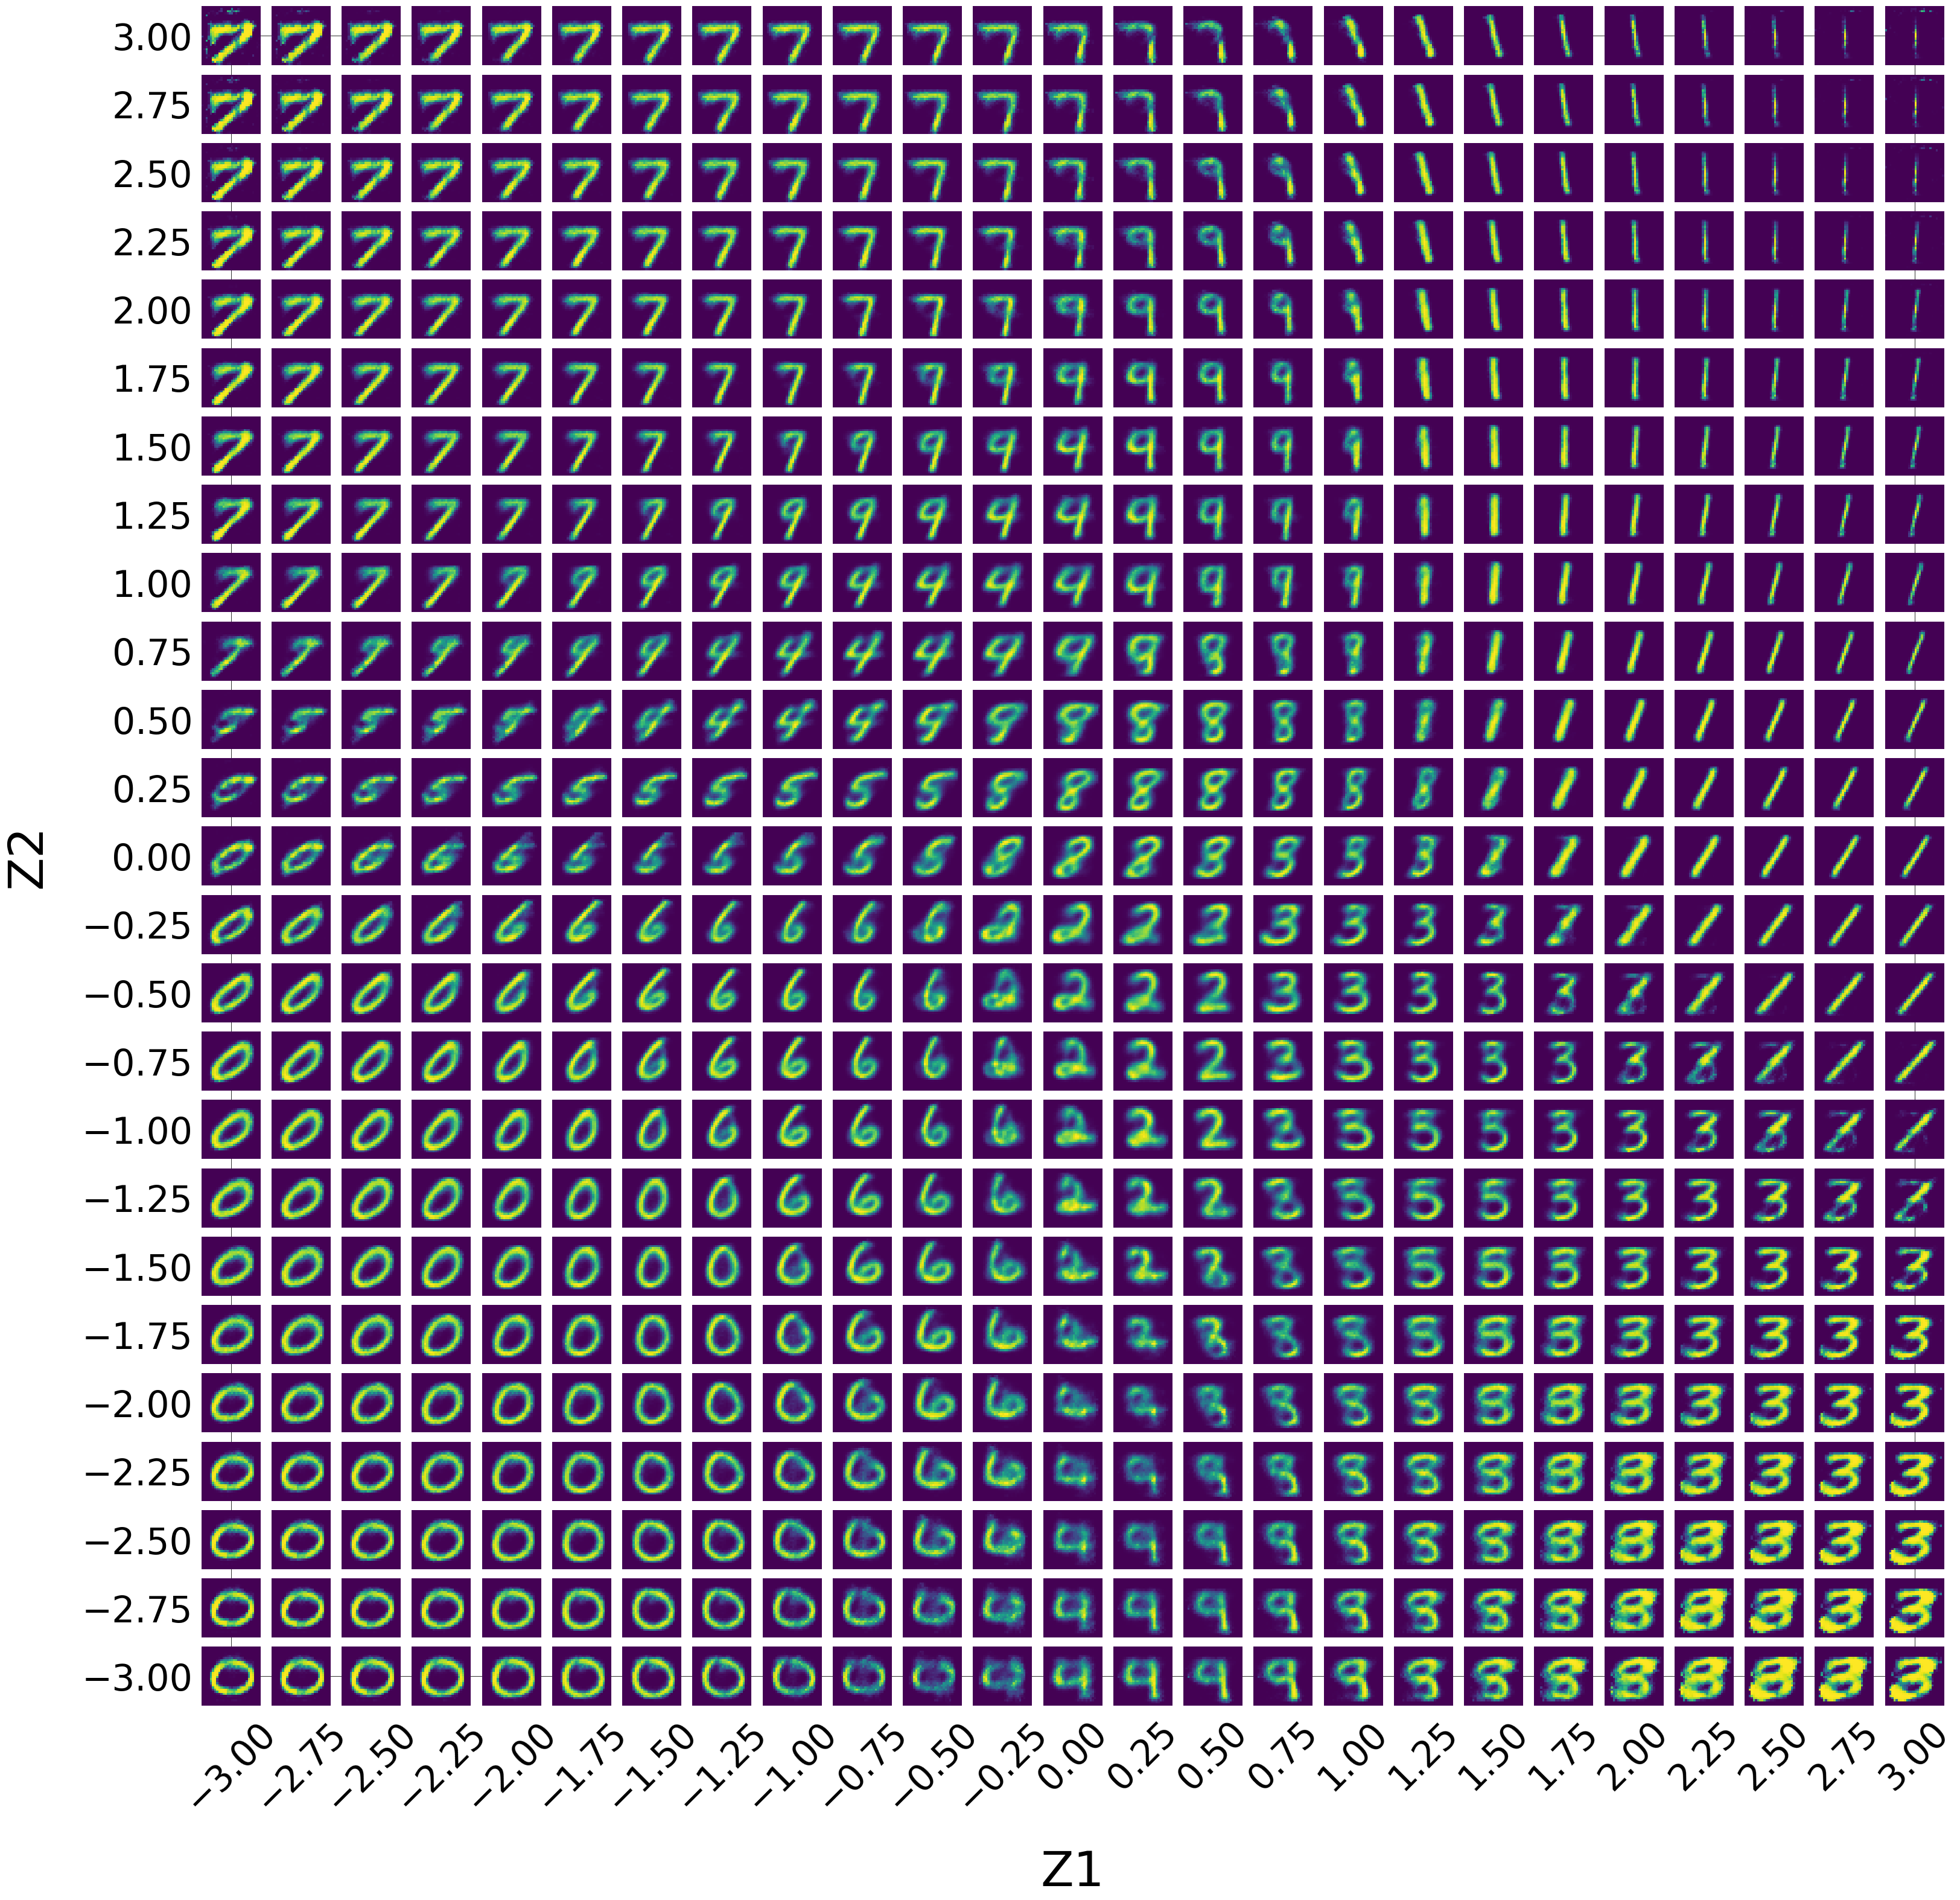

In [22]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
fig,ax = plt.subplots(figsize=(50, 50))
list_z1 = [float(z) for z in disc_z1]
list_z2 = [float(z) for z in disc_z2]
for z1 in list_z1:
    for z2 in list_z2:
        im = OffsetImage(get_p_x_cond_z1_z2(z1, z2).reshape(28, 28), zoom=3.5)
        ab = AnnotationBbox(im, (z1, z2), xycoords='data', frameon=False)
        ab.set_label('z1 = {}, z2 = {}'.format(z1, z2))
        ax.add_artist(ab)

plt.xticks(list_z1, rotation=45)
plt.yticks(list_z2)
plt.tick_params(axis='both', which='major', labelsize=60, pad=60)
ax.set_xlabel('Z1', fontsize=80, labelpad=50)
ax.set_ylabel('Z2', fontsize=80, labelpad=50)
plt.show()